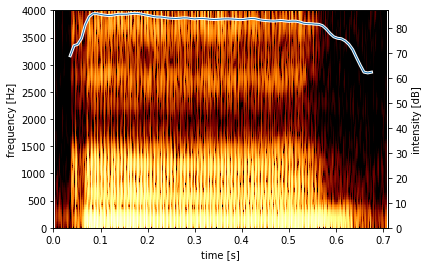

In [10]:
from scipy import signal
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import librosa
import IPython.display as ipd
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.io import push_notebook, output_notebook
from bokeh.layouts import gridplot
from bokeh.models import ColorBar, LogColorMapper, LogTicker
import soundfile as sf
import seaborn as sns
import parselmouth

def draw_spectrogram(spectrogram, dynamic_range=50):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")


snd = parselmouth.Sound('a_8000.wav')
intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

'0.3.3'